# Assignment 3
### General Instructions
  + The Python standard library is not enough to do solve these questions. You will need to import appropriate libraries for each task. Generally, you might import and use any library you wish unless otherwise stated. 
  + Where detail instructions like variable or function names, required libraries, and etc are not given by the question, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + When you are required to explain or answer in text format open a Markdown cell and enter your answer in it.
  + Do not remove or modify the original cells provided by the instructor.
  + Comment your code whenever needed using # sign at the beginning of the row.
  + Do not hesitate to communicate your questions to the TAs or instructors. Good luck! 

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'


import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb 
from sklearn.preprocessing import scale
from collections import Counter
from sklearn import linear_model
from sklearn import datasets
import statsmodels.api as sm
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## **Part A** <font color="blue">(7 points)</font>
Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. **<font color="blue">(0.5 points)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1 point)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


In [ ]:
#1)
from google.colab import files
uploaded = files.upload()

Saving ziptrain.csv to ziptrain (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ziptest.csv to ziptest (1).csv


In [ ]:
#1)
ziptrain = pd.read_csv('ziptrain.csv', sep=' ')
ziptest = pd.read_csv('ziptest.csv', sep=' ')

ziptrain = ziptrain.dropna(axis=1)

ziptrain2 =  ziptrain['6.0000']==2.0
ziptrain7 =  ziptrain['6.0000']==7.0
ziptrain2f = ziptrain[ziptrain2]
ziptrain7f = ziptrain[ziptrain7]

binar_train = [ziptrain2f,ziptrain7f]
binar_train = pd.concat(binar_train)
binar_train = binar_train.dropna(axis=1)

ziptest2 =  ziptest['9']==2
ziptest7 =  ziptest['9']==7
ziptest2f = ziptest[ziptest2]
ziptest7f = ziptest[ziptest7]

binar_test = [ziptest2f,ziptest7f]
binar_test = pd.concat(binar_test)










In [ ]:
#2)
#must remove y component(all 2 and 7 digits)

binar_train_x = binar_train.iloc[:,1:]
binar_train_y = binar_train.iloc[:,0]

binar_test_x = binar_test.iloc[:,1:]
binar_test_y = binar_test.iloc[:,0]


pca = PCA(n_components=2)
binar_train_stand = scale(binar_train_x.values)
pca.fit(binar_train_stand)
result = pca.transform(binar_train_stand)



PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

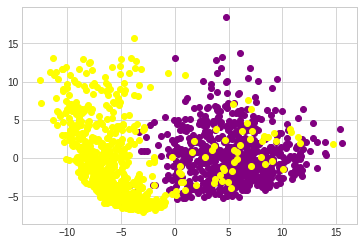

In [ ]:
#plt.scatter(result[:,0], result[:,1])

plt.scatter(result[0:688, 0], result[0:688, 1], c="purple")
plt.scatter(result[688:1376, 0],result[688:1376, 1], c="yellow")


In [ ]:
#3)

logr = LogisticRegression()

logr.fit(result,binar_train_y)




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#4)
pca = PCA(n_components=2)
binar_test_stand = scale(binar_test_x.values)
pca.fit(binar_test_stand)
result_test_x = pca.transform(binar_test_stand)


binar_test_predict_y = logr.predict(result_test_x)

conf_matrix = confusion_matrix(binar_test_y, binar_test_predict_y)

accuracy = np.trace(conf_matrix)/np.sum(conf_matrix)

print(accuracy)
f1_score(binar_test_y, binar_test_predict_y,pos_label=2)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

0.9478260869565217


0.9540816326530612

Accuracy = 0.9478260869565217, 
F1 Score = 0.9540816326530612

In [ ]:
#5)
print(conf_matrix)

[[187  11]
 [  7 140]]


In [ ]:
#6)
ziptrain_x = ziptrain.iloc[:,1:]
ziptrain_y = ziptrain.iloc[:,0]

pca = PCA(n_components=2)
pca.fit(ziptrain_x)
result2 = pca.transform(ziptrain_x)

pca = PCA(n_components=3)
pca.fit(ziptrain_x)
result3 = pca.transform(ziptrain_x)

pca = PCA(n_components=4)
pca.fit(ziptrain_x)
result4 = pca.transform(ziptrain_x)

pca = PCA(n_components=5)
pca.fit(ziptrain_x)
result5 = pca.transform(ziptrain_x)



PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#7) + #8)
lda2 = LinearDiscriminantAnalysis()
lda2.fit(result2,ziptrain_y)
lda3 = LinearDiscriminantAnalysis()
lda3.fit(result3,ziptrain_y)
lda4 = LinearDiscriminantAnalysis()
lda4.fit(result4,ziptrain_y)
lda5 = LinearDiscriminantAnalysis()
lda5.fit(result5,ziptrain_y)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
accuracy_cv2 = cross_val_score(lda2, result2, ziptrain_y, cv=5)
print(accuracy_cv2)
accuracy_cv3 = cross_val_score(lda3, result3, ziptrain_y, cv=5)
print(accuracy_cv3)
accuracy_cv4 = cross_val_score(lda4, result4, ziptrain_y, cv=5)
print(accuracy_cv2)
accuracy_cv5 = cross_val_score(lda5, result5, ziptrain_y, cv=5)
print(accuracy_cv5)

[0.54240766 0.5390411  0.54252401 0.55082418 0.54195323]
[0.59028728 0.57739726 0.57475995 0.58791209 0.5866575 ]
[0.54240766 0.5390411  0.54252401 0.55082418 0.54195323]
[0.73324213 0.7109589  0.71947874 0.71978022 0.71664374]


Based on the cross validated accuracy, the highest accuracy was produced by m = 5.

## **Part B** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

In [ ]:
#1)
x1 = np.linspace(-20,20,num=100)
x2 = np.power(x1,2)
x3 = np.power(x1,3)
x4 = np.power(x1,4)
x5 = np.power(x1,5)



In [ ]:
#2)
error = np.random.normal(loc=0,scale=4)

y = 1.75+(5*x1)+(0.05*x3)-(10.3*x5)+error




In [ ]:
#3)
new_x = np.concatenate((x1,x2,x3,x4,x5),axis=0)
new_x = np.arange(500).reshape((100,5))
x_train, x_test, y_train, y_test = train_test_split(new_x,y, test_size=0.25, train_size=0.75)

lasso = LassoCV(n_alphas=10,cv=5,random_state=0).fit(x_train,y_train)






In [ ]:
#4)
score = lasso.score(x_test,y_test)
alphas = lasso.alphas_
mse = lasso.mse_path_








[1.13721400e+09 5.27847981e+08 2.45005329e+08 1.13721400e+08
 5.27847981e+07 2.45005329e+07 1.13721400e+07 5.27847981e+06
 2.45005329e+06 1.13721400e+06]


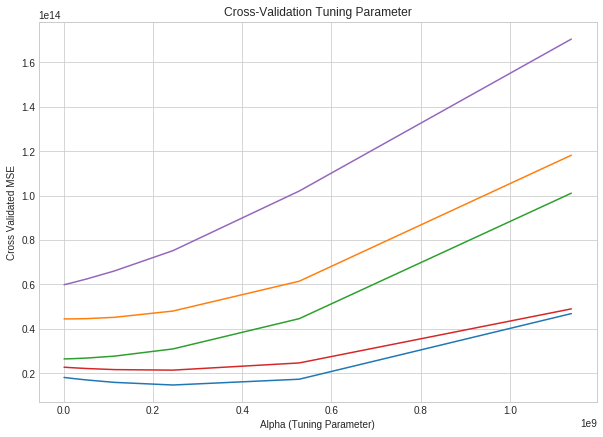

In [ ]:
size = plt.figure(figsize=(10,7))
plot = plt.plot(alphas, mse)
xlab = plt.xlabel('Alpha (Tuning Parameter)')
ylab = plt.ylabel('Cross Validated MSE')
title = plt.title('Cross-Validation Tuning Parameter')

Based on the graph would pick the tuning parameter with lowest MSE which would be around 0.2 on x acis of plot.

## **Part C** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data. 
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  


In [ ]:
#1)
mean_1 = [0, 0]
mean_2 = [2.5, 2.5]
mean_3 = [5, 5]
covari = [[1, 0], [0, 1]] 
x1, y1 = np.random.multivariate_normal(mean_1, covari, 167).T
x2, y2 = np.random.multivariate_normal(mean_2, covari, 167).T
x3, y3 = np.random.multivariate_normal(mean_3, covari, 167).T

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)





Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Scatterplot of Data')

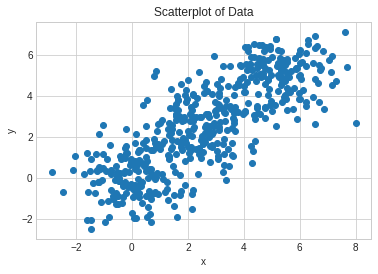

In [ ]:
#2)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of Data')

In [ ]:
#3)

x_shuff, y_shuff = shuffle(x,y)

resultsk = pd.DataFrame(data=np.hstack((x_shuff.reshape(-1,1), y_shuff.reshape(-1,1))),columns=['x','y'])

kmeans2 = KMeans(n_clusters =2)
kmeans2 = kmeans2.fit(resultsk)
category2 = kmeans2.predict(resultsk)
centroid2 = kmeans2.cluster_centers_

kmeans3 = KMeans(n_clusters =3)
kmeans3 = kmeans3.fit(resultsk)
category3 = kmeans3.predict(resultsk)
centroid3 = kmeans3.cluster_centers_

kmeans4 = KMeans(n_clusters =4)
kmeans4 = kmeans4.fit(resultsk)
category4 = kmeans4.predict(resultsk)
centroid4 = kmeans4.cluster_centers_


centroid4.shape
centroid3.shape
centroid2.shape


(4, 2)

(3, 2)

(2, 2)

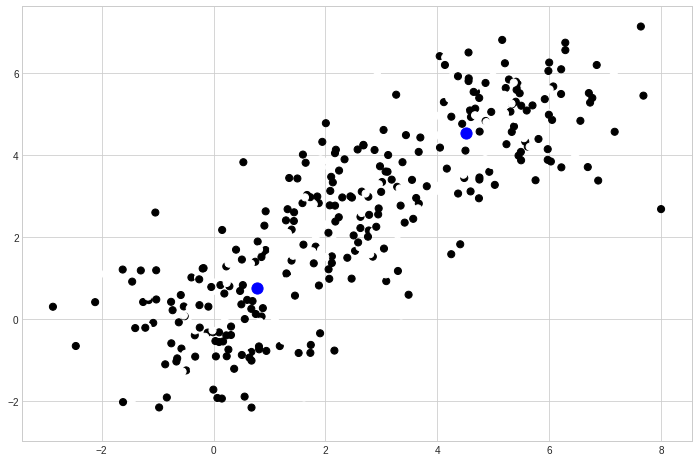

In [ ]:
#4)
figsize = plt.figure(figsize = (12,8))
plot = plt.scatter(x, y, c= category2, s=200, marker = ".") 
plot = plt.scatter(centroid2[:,0], centroid2[:,1], c='blue', s=500, marker = ".")

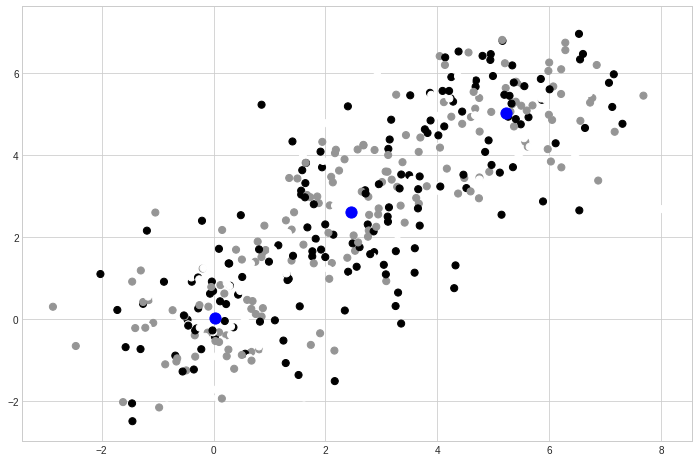

In [ ]:
figsize = plt.figure(figsize = (12,8))
plot = plt.scatter(x, y, c= category3, s=200, marker = ".") 
plot = plt.scatter(centroid3[:,0], centroid3[:,1], c='blue', s=500, marker = ".")

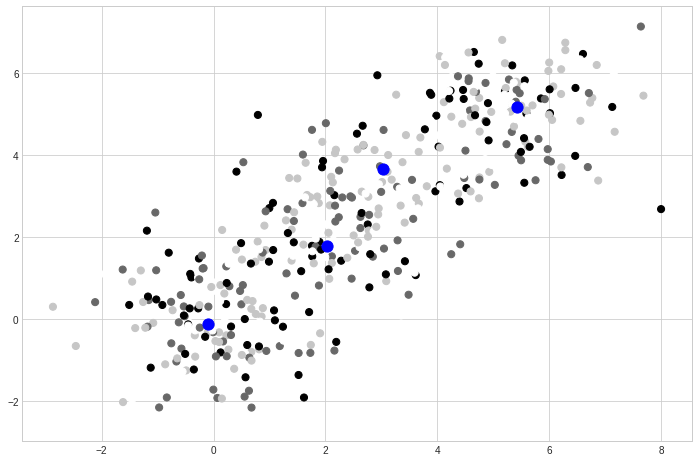

In [ ]:
figsize = plt.figure(figsize = (12,8))
plot = plt.scatter(x, y, c= category4, s=200, marker = ".") 
plot = plt.scatter(centroid4[:,0], centroid4[:,1], c='blue', s=500, marker = ".")